In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/census-income .csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


null values

In [5]:
df.isnull().sum().sum()

np.int64(0)

duplicate


In [6]:
df.duplicated().sum()

np.int64(24)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

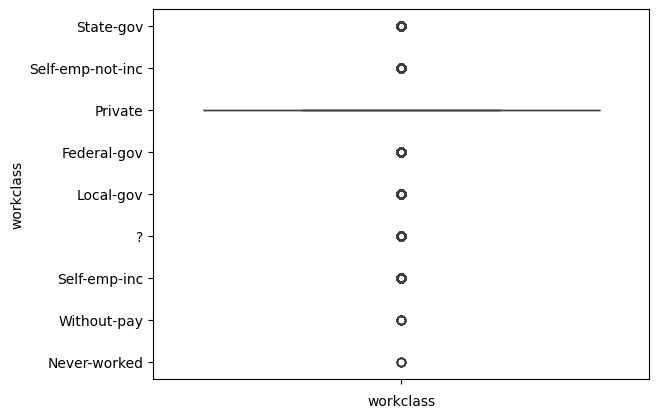

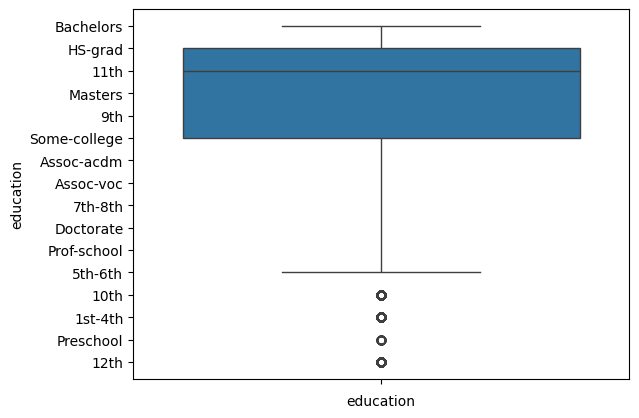

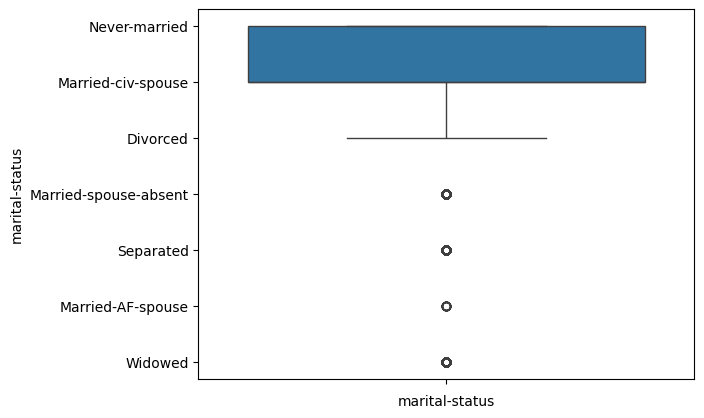

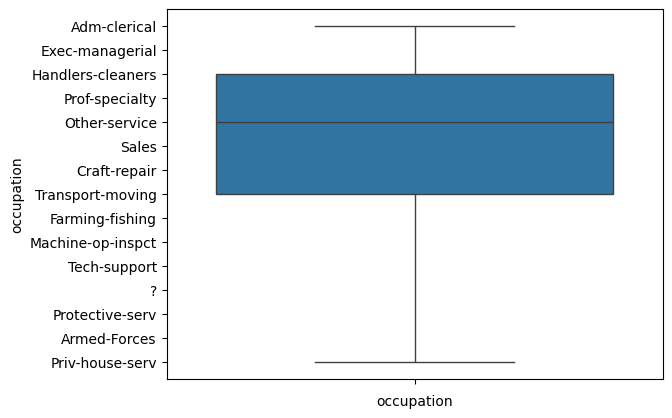

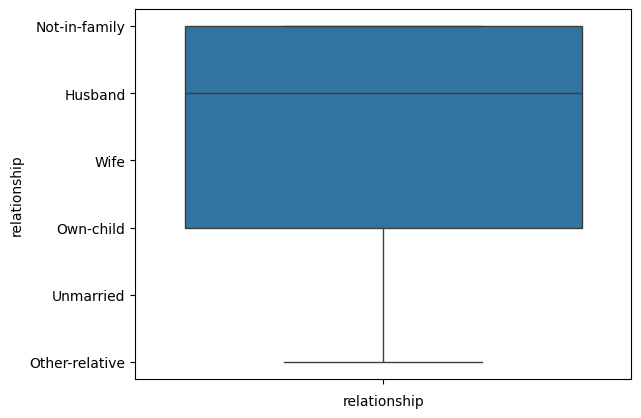

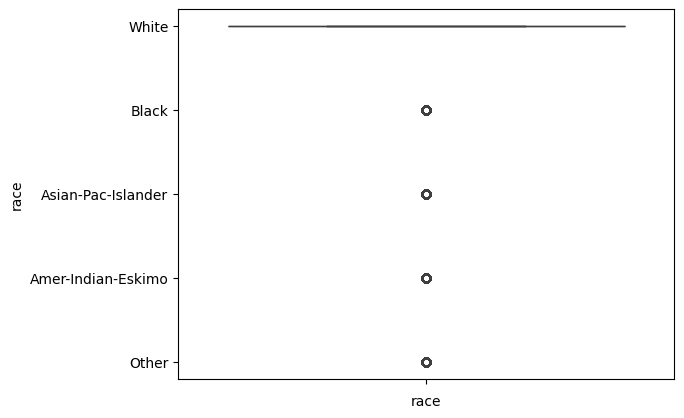

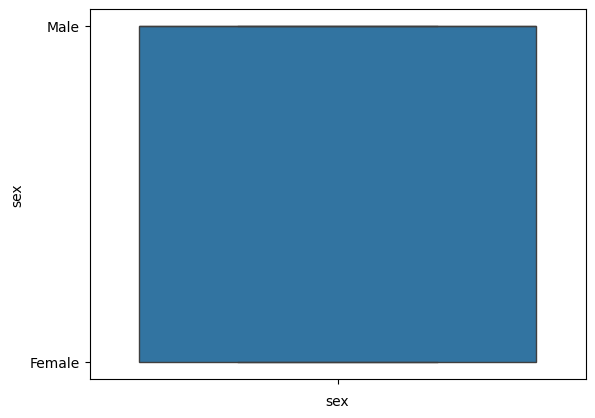

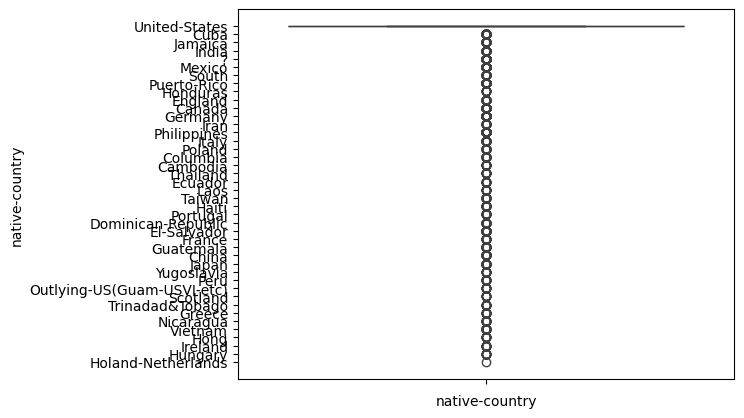

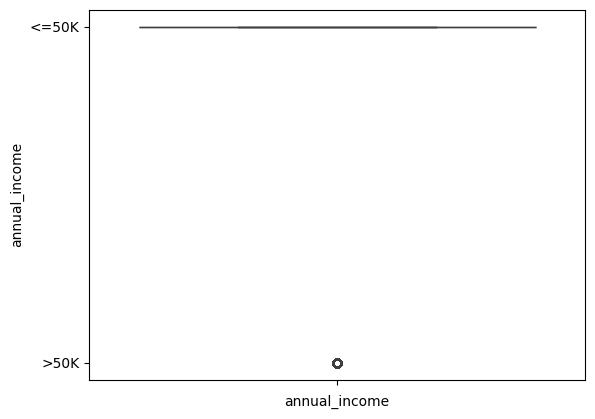

In [10]:
for col in df.columns:
  if(df[col].dtype == 'object'):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()


In [14]:
out_list=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']
for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR= Q3-Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]>=LB) & (df[col]<=UB)]

In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
le = LabelEncoder()

In [17]:
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=le.fit_transform(df[col])

In [18]:
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
2,38,4,215646,8,9,0,6,1,4,1,0,0,40,38,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
4,28,4,338409,6,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,9,14,2,4,5,4,0,0,0,40,38,0
11,30,7,141297,6,13,2,10,0,1,1,0,0,40,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,32,4,34066,0,6,2,6,0,0,1,0,0,40,38,0
32554,53,4,321865,9,14,2,4,0,4,1,0,0,40,38,1
32555,22,4,310152,11,10,4,11,1,4,1,0,0,40,38,0
32557,40,4,154374,8,9,2,7,0,4,1,0,0,40,38,1


In [21]:
x = df.drop('annual_income',axis=1)
y = df['annual_income']

In [22]:
y

,annual_income
2,0
3,0
4,0
5,0
11,1
...,...
32551,0
32554,1
32555,0
32557,1


Check for multicollinearity using VIF

In [23]:
vif_data=pd.DataFrame()

In [24]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [25]:
vif_data['Features']=x.columns

In [26]:
vif_data

,Features
0,age
1,workclass
2,fnlwgt
3,education
4,education-num
5,marital-status
6,occupation
7,relationship
8,race
9,sex


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i) #calculating the vif value
  vif_values.append(vif)

vif_data['VIF_Values']=vif_values

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [28]:
vif_data

,Features,VIF_Values
0,age,1.155888
1,workclass,1.050355
2,fnlwgt,1.006551
3,education,1.059171
4,education-num,1.083151
5,marital-status,1.116223
6,occupation,1.075243
7,relationship,1.605800
8,race,1.044820
9,sex,1.507255


In [53]:
vif_data=pd.DataFrame()

In [54]:
vif_data

""


In [56]:
x = df.drop('annual_income',axis=1)
y = df['annual_income']

In [57]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country
2,38,4,215646,8,9,0,6,1,4,1,0,0,38
3,53,4,234721,1,7,2,6,0,2,1,0,0,38
4,28,4,338409,6,13,2,10,5,2,0,0,0,5
5,37,4,284582,9,14,2,4,5,4,0,0,0,38
11,30,7,141297,6,13,2,10,0,1,1,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32551,32,4,34066,0,6,2,6,0,0,1,0,0,38
32554,53,4,321865,9,14,2,4,0,4,1,0,0,38
32555,22,4,310152,11,10,4,11,1,4,1,0,0,38
32557,40,4,154374,8,9,2,7,0,4,1,0,0,38


In [58]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'native-country'],
      dtype='object')

In [59]:
vif_data['Features']=x.columns

In [60]:
vif_data

,Features
0,age
1,workclass
2,fnlwgt
3,education
4,education-num
5,marital-status
6,occupation
7,relationship
8,race
9,sex


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i) #calculating the vif value
  vif_values.append(vif)

vif_data['VIF_Values']=vif_values

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [62]:
vif_data

,Features,VIF_Values
0,age,10.022954
1,workclass,8.301400
2,fnlwgt,5.189679
3,education,8.153542
4,education-num,21.175817
5,marital-status,3.931351
6,occupation,3.425979
7,relationship,2.654956
8,race,15.175791
9,sex,4.057807


In [63]:
x.drop('native-country',axis=1,inplace=True)

In [64]:
vif_data=pd.DataFrame()
vif_data['Features']=x.columns

vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i) #calculating the vif value
  vif_values.append(vif)

vif_data['VIF_Values']=vif_values

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [65]:
vif_data

,Features,VIF_Values
0,age,9.502026
1,workclass,8.193761
2,fnlwgt,5.157208
3,education,8.029227
4,education-num,20.468239
5,marital-status,3.867235
6,occupation,3.423493
7,relationship,2.563147
8,race,13.408486
9,sex,3.994534


In [66]:
x.drop('education-num',axis=1,inplace=True)

In [67]:
vif_data=pd.DataFrame()
vif_data['Features']=x.columns

vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i) #calculating the vif value
  vif_values.append(vif)

vif_data['VIF_Values']=vif_values

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [68]:
vif_data

,Features,VIF_Values
0,age,8.497460
1,workclass,8.010106
2,fnlwgt,5.088586
3,education,6.942467
4,marital-status,3.711029
5,occupation,3.311854
6,relationship,2.530558
7,race,12.446963
8,sex,3.974329
9,capital-gain,NaN


In [69]:
x.drop('race',axis=1,inplace=True)

In [70]:
vif_data=pd.DataFrame()
vif_data['Features']=x.columns

vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i) #calculating the vif value
  vif_values.append(vif)

vif_data['VIF_Values']=vif_values

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [71]:
vif_data

,Features,VIF_Values
0,age,7.413397
1,workclass,7.562754
2,fnlwgt,4.937290
3,education,6.592770
4,marital-status,3.632167
5,occupation,3.302701
6,relationship,2.477454
7,sex,3.792543
8,capital-gain,NaN
9,capital-loss,NaN


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)

In [74]:
x_train.shape


(9196, 10)

In [75]:
x_test.shape

(3066, 10)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model=LogisticRegression()

In [78]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
y_pred=model.predict(x_test)

In [80]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_pred,y_test)*100

81.86562296151337

Build a Linear Regression model to predict Hours-per-week.


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [32]:
features =['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']
target = 'hours-per-week'

In [33]:
x = df[features]
y = df[target]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [40]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R-squared (R2): 1.00


In [41]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(results_df.head())

,Actual,Predicted
6797,40,40.0
3198,40,40.0
20494,40,40.0
25028,40,40.0
12920,40,40.0
